In [1]:
import os
import sys
# SRC_DIR environment variable should be the absolute path to the 'multicopy-STR-genotyping' directory
sys.path.append(os.environ["SRC_DIR"])

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from multicopy_STR_genotyping import file_io

sns.set_context("poster")
%matplotlib inline

In [4]:
df_repeats_gangstr, df_gangstr = file_io.dfs_from_vcf(filename="../../data/simulated_reads/variants/GangSTR_simulated_trisomy_21.vcf", samples=["simulated_trisomy_21"], vcf_format="GangSTR")
df_gangstr["copy_number"] = 2
df_gangstr = df_gangstr.rename(columns = {"frequencies": "frequencies_gangstr", "genotype": "genotype_gangstr"})
df_gangstr

,sample,str_id,copy_number,frequencies_gangstr,genotype_gangstr
0,simulated_trisomy_21,chr21_5011212,2,{3: 56},"[3, 3]"
1,simulated_trisomy_21,chr21_5013077,2,{6: 50},"[6, 6]"
2,simulated_trisomy_21,chr21_5014892,2,{6: 44},"[6, 6]"
3,simulated_trisomy_21,chr21_5016248,2,{6: 41},"[6, 6]"
4,simulated_trisomy_21,chr21_5016789,2,"{9: 11, 10: 26}","[9, 10]"
...,...,...,...,...,...
21493,simulated_trisomy_21,chr21_46688832,2,"{12: 16, 16: 30}","[12, 16]"
21494,simulated_trisomy_21,chr21_46689712,2,{3: 46},"[3, 3]"
21495,simulated_trisomy_21,chr21_46696282,2,{11: 26},"[11, 11]"
21496,simulated_trisomy_21,chr21_46697535,2,{20: 29},"[20, 20]"


In [5]:
df_repeats_constrain, df_constrain = file_io.dfs_from_vcf(filename="../../data/simulated_reads/variants/ConSTRain_simulated_trisomy_21.vcf", samples=["simulated_trisomy_21"])
df_constrain = df_constrain.rename(columns = {"frequencies": "frequencies_constrain", "genotype": "genotype_constrain"})
df_constrain

,sample,str_id,copy_number,frequencies_constrain,genotype_constrain
0,simulated_trisomy_21,chr21_5011212,3,{3: 55},"[3, 3, 3]"
1,simulated_trisomy_21,chr21_5013077,3,{6: 50},"[6, 6, 6]"
2,simulated_trisomy_21,chr21_5014892,3,{6: 43},"[6, 6, 6]"
3,simulated_trisomy_21,chr21_5016248,3,{6: 40},"[6, 6, 6]"
4,simulated_trisomy_21,chr21_5016789,3,"{9: 12, 10: 32}","[9, 10, 10]"
...,...,...,...,...,...
21499,simulated_trisomy_21,chr21_46688832,3,"{12: 15, 16: 29}","[12, 16, 16]"
21500,simulated_trisomy_21,chr21_46689712,3,{3: 45},"[3, 3, 3]"
21501,simulated_trisomy_21,chr21_46696282,3,{11: 39},"[11, 11, 11]"
21502,simulated_trisomy_21,chr21_46697535,3,{20: 41},"[20, 20, 20]"


In [6]:
df_str_calls = (df_constrain[["str_id", "frequencies_constrain", "genotype_constrain"]]
                   .merge(df_gangstr[["str_id", "frequencies_gangstr", "genotype_gangstr"]], on="str_id", how="inner"))
df_str_calls

,str_id,frequencies_constrain,genotype_constrain,frequencies_gangstr,genotype_gangstr
0,chr21_5011212,{3: 55},"[3, 3, 3]",{3: 56},"[3, 3]"
1,chr21_5013077,{6: 50},"[6, 6, 6]",{6: 50},"[6, 6]"
2,chr21_5014892,{6: 43},"[6, 6, 6]",{6: 44},"[6, 6]"
3,chr21_5016248,{6: 40},"[6, 6, 6]",{6: 41},"[6, 6]"
4,chr21_5016789,"{9: 12, 10: 32}","[9, 10, 10]","{9: 11, 10: 26}","[9, 10]"
...,...,...,...,...,...
21493,chr21_46688832,"{12: 15, 16: 29}","[12, 16, 16]","{12: 16, 16: 30}","[12, 16]"
21494,chr21_46689712,{3: 45},"[3, 3, 3]",{3: 46},"[3, 3]"
21495,chr21_46696282,{11: 39},"[11, 11, 11]",{11: 26},"[11, 11]"
21496,chr21_46697535,{20: 41},"[20, 20, 20]",{20: 29},"[20, 20]"


In [7]:
df_repeats_hg002 = pd.read_csv("../../data/HG002/variants/HG002_GRCh38_STR_lengths.csv")
df_repeats_hg002 = df_repeats_hg002[df_repeats_hg002["str_id"].isin(df_str_calls["str_id"])].reset_index(drop=True)
df_repeats_hg002

,str_id,region_len_ref,region_len_mat,region_len_pat
0,chr21_5354757,12,12.0,12.0
1,chr21_7205148,18,18.0,18.0
2,chr21_7227685,20,20.0,20.0
3,chr21_8987815,16,16.0,16.0
4,chr21_8987982,10,10.0,10.0
...,...,...,...,...
19452,chr21_46688832,32,24.0,32.0
19453,chr21_46689712,12,12.0,12.0
19454,chr21_46696282,11,11.0,11.0
19455,chr21_46697535,20,20.0,20.0


In [8]:
names = ["chr", "start", "end", "period", "unit"]
df_strs_in_segdup = (pd.read_csv("../../data/hg38_ver13_0boe_mononucleotides_in_segdup.bed", sep="\t", names=names)
                        .query("chr == 'chr21'")
                        .assign(str_id = lambda x: [f"{i}_{j}" for i, j in zip(x["chr"], x["start"] + 1)]))
df_strs_in_segdup

,chr,start,end,period,unit,str_id
50287,chr21,5011211,5011223,4,AATC,chr21_5011212
50288,chr21,5013076,5013088,2,CA,chr21_5013077
50289,chr21,5014891,5014903,2,CA,chr21_5014892
50290,chr21,5016247,5016265,3,GAG,chr21_5016248
50291,chr21,5016788,5016798,1,G,chr21_5016789
...,...,...,...,...,...,...
53380,chr21,46688831,46688863,2,AC,chr21_46688832
53381,chr21,46689711,46689723,4,ATTT,chr21_46689712
53382,chr21,46696281,46696292,1,T,chr21_46696282
53383,chr21,46697534,46697554,1,A,chr21_46697535


In [9]:
df_comparison = (df_repeats_hg002
     .merge(df_str_calls, on="str_id", how="inner")
     .merge(df_repeats_constrain[["str_id", "period", "ref"]], how="inner")
     .query("region_len_mat % period == 0 and region_len_pat % period == 0")
     .assign(region_len_mat = lambda x: x["region_len_mat"].convert_dtypes(int) // x["period"],
             region_len_pat = lambda x: x["region_len_pat"].convert_dtypes(int) // x["period"],
             genotype_sim = lambda x: [sorted([i, j, k]) for i, j, k in zip(x["region_len_mat"], x["region_len_pat"], x["ref"])],
             n_distinct_alleles = lambda x: [len(set(i)) for i in x["genotype_sim"]])
     .filter(["str_id", "period", "ref", "unit", "genotype_constrain", "frequencies_constrain", "genotype_gangstr", "frequencies_gangstr", "genotype_sim", "n_distinct_alleles"], axis=1))

df_comparison = df_comparison[~df_comparison["str_id"].isin(df_strs_in_segdup["str_id"])].reset_index(drop=True)
df_comparison

,str_id,period,ref,genotype_constrain,frequencies_constrain,genotype_gangstr,frequencies_gangstr,genotype_sim,n_distinct_alleles
0,chr21_10324665,5,3,"[3, 3, 3]",{3: 23},"[3, 3]",{3: 17},"[3, 3, 3]",1
1,chr21_12974501,1,10,"[10, 10, 10]",{10: 48},"[10, 10]",{10: 35},"[10, 10, 10]",1
2,chr21_13987256,6,2,"[2, 2, 2]",{2: 49},"[2, 2]",{2: 37},"[2, 2, 2]",1
3,chr21_13987386,5,2,"[2, 2, 2]",{2: 53},"[2, 2]",{2: 37},"[2, 2, 2]",1
4,chr21_13998484,1,12,"[12, 13, 14]","{12: 22, 13: 18, 14: 12}","[12, 13]","{12: 18, 13: 14, 14: 9}","[12, 13, 14]",3
...,...,...,...,...,...,...,...,...,...
18085,chr21_46657377,1,14,"[14, 14, 14]",{14: 26},"[14, 14]",{14: 19},"[14, 14, 14]",1
18086,chr21_46666129,1,11,"[11, 11, 11]",{11: 35},"[11, 11]",{11: 28},"[11, 11, 11]",1
18087,chr21_46668752,1,14,"[12, 14, 14]","{12: 23, 14: 27}","[12, 14]","{12: 20, 14: 22}","[12, 14, 14]",2
18088,chr21_46672634,1,12,"[12, 12, 12]",{12: 68},"[12, 12]",{12: 57},"[12, 12, 12]",1


In [13]:
n_mistakes = df_comparison[df_comparison["genotype_constrain"] != df_comparison["genotype_sim"]].shape[0]

print(f"{n_mistakes} ({n_mistakes / df_comparison.shape[0] * 100:.3f}%)")

142 (0.785%)


In [14]:
df_comparison[df_comparison["genotype_constrain"] != df_comparison["genotype_sim"]]

,str_id,period,ref,genotype_constrain,frequencies_constrain,genotype_gangstr,frequencies_gangstr,genotype_sim,n_distinct_alleles
40,chr21_14146773,1,26,"[20, 21, 21]","{20: 14, 21: 20, 26: 5}","[21, 26]","{20: 12, 21: 14, 26: 4}","[20, 21, 26]",3
77,chr21_14243225,2,19,"[19, 19, 19]","{19: 22, 28: 4}","[19, 28]","{19: 23, 28: 8}","[19, 19, 28]",2
171,chr21_14438576,1,18,"[22, 22, 22]","{18: 6, 22: 31}","[18, 22]","{18: 4, 22: 24}","[18, 22, 22]",2
396,chr21_14885045,1,38,"[14, 38, 38]","{14: 17, 38: 20}","[14, 38]","{14: 17, 38: 18}","[14, 14, 38]",2
505,chr21_15109897,1,25,"[24, 24, 25]","{24: 22, 25: 21}","[24, 25]","{24: 14, 25: 17}","[24, 25, 25]",2
...,...,...,...,...,...,...,...,...,...
17926,chr21_46415366,1,30,"[29, 30, 30]","{29: 13, 30: 16}","[29, 30]","{29: 8, 30: 12}","[29, 29, 30]",2
17960,chr21_46468262,1,20,"[20, 20, 22]","{20: 18, 22: 18}","[20, 22]","{20: 14, 22: 14}","[20, 22, 22]",2
17971,chr21_46477544,2,12,"[12, 12, 20]","{12: 23, 20: 20}","[12, 20]","{12: 23, 20: 26}","[12, 20, 20]",2
18060,chr21_46632747,1,13,"[13, 13, 14]","{13: 25, 14: 22}","[13, 14]","{13: 20, 14: 19}","[13, 14, 14]",2


In [33]:
n_mistakes = df_comparison[df_comparison["genotype_constrain"] != df_comparison["genotype_sim"]].shape[0]

print(f"{n_mistakes / df_comparison.shape[0] * 100:.3f}%")

(df_comparison[
    (df_comparison["genotype_constrain"] != df_comparison["genotype_sim"]) &
    (df_comparison["period"] > 1) &
    np.array(([i not in j for i, j in zip(df_comparison["ref"], df_comparison["genotype_constrain"])]))].head(20))

1.028


,str_id,period,ref,genotype_constrain,frequencies_constrain,genotype_gangstr,frequencies_gangstr,genotype_sim,n_distinct_alleles
2821,chr21_19491193,2,9,"[8, 8, 8]","{8: 31, 9: 7}","[8, 8]","{8: 31, 9: 7}","[8, 8, 9]",2
3291,chr21_20398635,2,9,"[11, 11, 11]","{9: 5, 11: 25}","[9, 11]","{9: 5, 11: 23}","[9, 11, 11]",2
3408,chr21_20606508,2,11,"[12, 12, 12]","{11: 4, 12: 34}","[12, 12]","{11: 4, 12: 34}","[11, 12, 12]",2
4867,chr21_23348086,2,12,"[13, 13, 16]","{12: 4, 13: 16, 16: 12}","[13, 16]","{12: 4, 13: 16, 16: 13}","[12, 13, 16]",3
8902,chr21_30958092,2,25,"[20, 20, 20]","{20: 24, 25: 4}","[20, 25]","{20: 25, 25: 4}","[20, 20, 25]",2
11413,chr21_34556066,4,8,"[7, 7, 10]","{7: 14, 8: 5, 10: 12}","[7, 10]","{7: 15, 8: 5, 10: 13}","[7, 8, 10]",3
17047,chr21_44468366,4,11,"[8, 12, 12]","{8: 7, 11: 4, 12: 14}","[8, 12]","{8: 8, 11: 4, 12: 14}","[8, 11, 12]",3
17080,chr21_44572835,2,26,"[23, 23, 23]","{23: 13, 26: 3}","[23, 26]","{23: 15, 26: 3}","[23, 23, 26]",2


In [18]:
print(df_comparison["n_distinct_alleles"].value_counts())
df_comparison["n_distinct_alleles"].value_counts(normalize=True)

n_distinct_alleles
1    13465
2     3805
3      820
Name: count, dtype: int64


n_distinct_alleles
1    0.744334
2    0.210337
3    0.045329
Name: proportion, dtype: float64

In [21]:
df_comparison.query("n_distinct_alleles == 3").head(50)

,str_id,period,ref,genotype_constrain,frequencies_constrain,genotype_gangstr,frequencies_gangstr,genotype_sim,n_distinct_alleles
4,chr21_13998484,1,12,"[12, 13, 14]","{12: 22, 13: 18, 14: 12}","[12, 13]","{12: 18, 13: 14, 14: 9}","[12, 13, 14]",3
13,chr21_14079449,1,22,"[21, 22, 23]","{21: 13, 22: 12, 23: 22}","[21, 23]","{21: 11, 22: 8, 23: 20}","[21, 22, 23]",3
14,chr21_14079765,1,10,"[10, 11, 12]","{10: 12, 11: 23, 12: 20}","[11, 12]","{10: 10, 11: 20, 12: 15}","[10, 11, 12]",3
22,chr21_14094712,1,22,"[22, 31, 36]","{22: 11, 31: 10, 36: 11}","[22, 36]","{22: 8, 31: 9, 36: 11}","[22, 31, 36]",3
23,chr21_14106744,2,15,"[13, 15, 16]","{13: 16, 15: 18, 16: 9}","[13, 15]","{13: 16, 15: 18, 16: 9}","[13, 15, 16]",3
40,chr21_14146773,1,26,"[20, 21, 21]","{20: 14, 21: 20, 26: 5}","[21, 26]","{20: 12, 21: 14, 26: 4}","[20, 21, 26]",3
69,chr21_14213292,4,11,"[10, 11, 13]","{10: 12, 11: 11, 13: 9}","[10, 13]","{10: 12, 11: 12, 13: 12}","[10, 11, 13]",3
132,chr21_14375492,1,22,"[22, 25, 26]","{22: 17, 25: 12, 26: 16}","[22, 26]","{22: 16, 25: 10, 26: 12}","[22, 25, 26]",3
169,chr21_14436442,1,35,"[23, 24, 35]","{23: 9, 24: 16, 35: 12}","[24, 35]","{23: 9, 24: 14, 35: 10}","[23, 24, 35]",3
254,chr21_14581345,1,32,"[32, 37, 40]","{32: 13, 37: 8, 40: 11}","[32, 40]","{32: 11, 37: 7, 40: 8}","[32, 37, 40]",3


In [16]:
(df_comparison
 .assign(correct = lambda x: x["genotype_constrain"] == x["genotype_sim"])
 .filter(["n_distinct_alleles", "correct"])
 .groupby("n_distinct_alleles", as_index=False)
 .value_counts(normalize=True))

,n_distinct_alleles,correct,proportion
0,1,True,1.000000
1,2,True,0.974770
2,2,False,0.025230
3,3,True,0.943902
4,3,False,0.056098


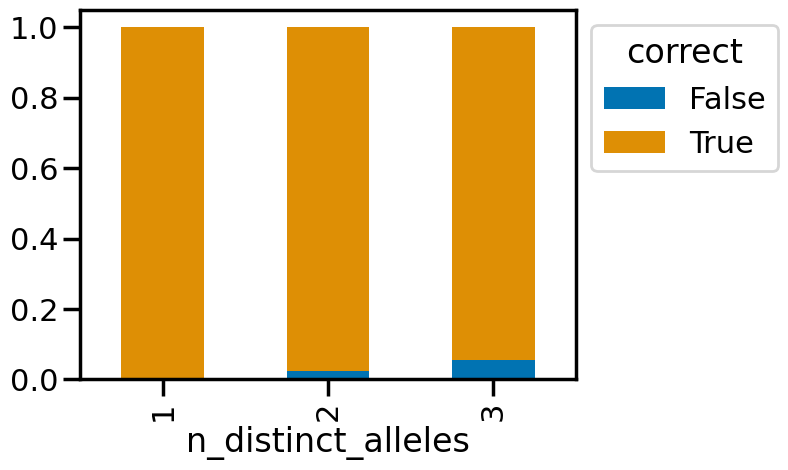

In [17]:
ax = (df_comparison
 .assign(correct = lambda x: x["genotype_constrain"] == x["genotype_sim"])
 .filter(["n_distinct_alleles", "correct"])
 .groupby("n_distinct_alleles", as_index=True)
 .value_counts(normalize=True)
 .unstack()
 .plot(
     kind="bar", 
     stacked=True, 
     color=sns.color_palette("colorblind")[:2]))

_ = ax.get_legend().set(bbox_to_anchor = (1, 1))